# Analyzing CIA Factbook Data Using SQLite and Python

## Introduction

This project contains data from the [CIA World Factbook](https://www.cia.gov/library/publications/the-world-factbook/), a compendium of statistics about all of the countries on Earth. The Factbook contains demographic information like:

* `population` - The population as of 2015.
* `population_growth` - The annual population growth rate, as a percentage.
* `area` - The total land and water area.

You can download the SQLite database, `factbook.db`, [from this GitHub repo](https://github.com/factbook/factbook.sql/releases) if you want to work with it on your own computer. 

## Overview of the data

In [4]:
import sqlite3
import pandas as pd
conn = sqlite3.connect("factbook.db")

q = "SELECT * FROM sqlite_master WHERE type='table';"
cursor = conn.cursor()
cursor.execute(q).fetchall()

[('table',
  'facts',
  'facts',
  2,
  'CREATE TABLE "facts" ("id" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, "code" varchar(255) NOT NULL, "name" varchar(255) NOT NULL, "area" integer, "area_land" integer, "area_water" integer, "population" integer, "population_growth" float, "birth_rate" float, "death_rate" float, "migration_rate" float, "created_at" datetime, "updated_at" datetime)'),
 ('table',
  'sqlite_sequence',
  'sqlite_sequence',
  3,
  'CREATE TABLE sqlite_sequence(name,seq)')]

In [6]:
pd.read_sql_query(q,conn)

,type,name,tbl_name,rootpage,sql
0,table,facts,facts,2,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


In [5]:
q1 = "SELECT * FROM facts LIMIT 5"
pd.read_sql_query(q1,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


- `name` - The name of the country.
- `area` - The total land and sea area of the country.
- `population` - The country's population.
- `population_growth` - The country's population growth as a percentage.
- `birth_rate` - The country's birth rate, or the number of births a year per 1,000 people.
- `death_rate` - The country's death rate, or the number of death a year per 1,000 people.
- `area` - The country's total area (both land and water).
- `area_land` - The country's land area in square kilometers.
- `area_water` - The country's water area in square kilometers.

## Summary Statistics

In [7]:
q2 = "SELECT MIN(population), MAX(population), MIN(population_growth), MAX(population_growth) FROM facts;"
pd.read_sql_query(q2,conn)

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


## Exploring Outliers

In [11]:
q3 = "SELECT * FROM facts WHERE population == (SELECT MIN(population) FROM facts);"
pd.read_sql_query(q3,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None,2015-11-01 13:38:44.885746,2015-11-01 13:38:44.885746


In [13]:
q4 = "SELECT * FROM facts WHERE population == (SELECT MAX(population) FROM facts);"
pd.read_sql_query(q4,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None,2015-11-01 13:39:09.910721,2015-11-01 13:39:09.910721


### Observations

It seems like the table contains a row for the whole world, which explains the population of over 7.2 billion. It also seems like the table contains a row for Antarctica, which explains the population of 0. This seems to match the CIA Factbook [page for Antarctica](https://www.cia.gov/library/publications/the-world-factbook/geos/ay.html).

## Histograms

/Users/Arjun/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111280cc0>,
      dtype=object)

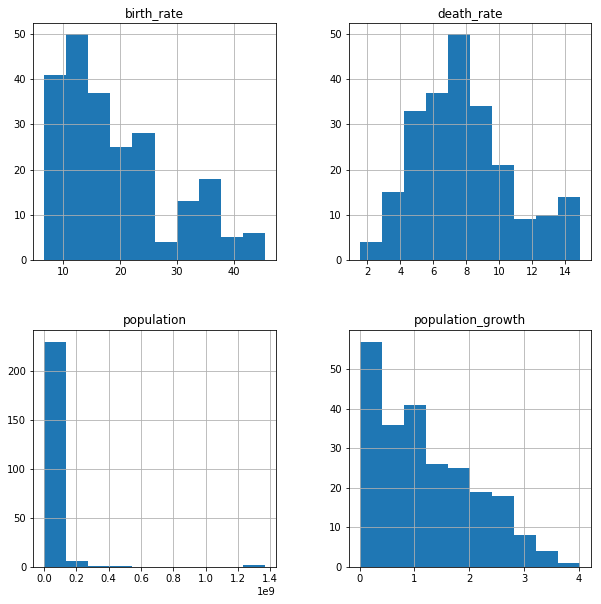

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

q5 = "SELECT population, population_growth, birth_rate, death_rate FROM facts WHERE population != (SELECT MAX(population) FROM facts) AND population != (SELECT MIN(population) FROM facts);"
pd.read_sql_query(q5,conn).hist(ax=ax)

## Which countries have the highest population density?

Population density is the ratio of population to land area. Compare your results with those [from Wikipedia](https://simple.wikipedia.org/wiki/List_of_countries_by_population_density).

In [18]:
q6 = "SELECT name, CAST(population AS float)/CAST(area_land AS float) population_density FROM facts ORDER BY population_density DESC LIMIT 20;"
pd.read_sql_query(q6,conn)

,name,population_density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8259.784571
3,Hong Kong,6655.271202
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1132226d8>]],
      dtype=object)

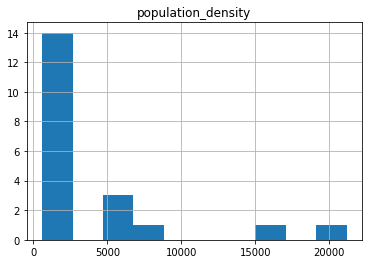

In [28]:
pd.read_sql_query(q6,conn).hist()

## Which countries have the highest ratios of water to land? Which countries have more water than land?

In [29]:
q7 = "SELECT name, CAST(area_water AS float)/CAST(area_land AS float) water_land_ratio FROM facts ORDER BY water_land_ratio DESC LIMIT 20;"
pd.read_sql_query(q7,conn)

,name,water_land_ratio
0,British Indian Ocean Territory,905.666667
1,Virgin Islands,4.520231
2,Puerto Rico,0.554791
3,"Bahamas, The",0.386613
4,Guinea-Bissau,0.284673
5,Malawi,0.259396
6,Netherlands,0.225710
7,Uganda,0.222922
8,Eritrea,0.164356
9,Liberia,0.156240
